<h1 style="font-size:30px">Exploratory Analysis</h1>
<hr>

1. Basic information
2. Distributions of numeric features
3. Distributions of categorical features
4. Segmentations
5. Advanced segmentations
6. Correlations

<span style="font-size:18px">**Import libraries**</span>

In [1]:
# Numpy for numerical computing
import numpy as np

# Pandas for Dataframes
import pandas as pd
pd.set_option('display.max_columns',100)

# Matplolib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

<span style="font-size:18px">**Load dataset**</span>

In [2]:
df = pd.read_csv('diamonds.csv')

<span style="font-size:18px">**1. Basic information**</span>

In [3]:
# Dataframe dimensions
df.shape

(53940, 11)

* Which are the **numeric** features? Unnamed: 0, carat, depth, table, x, y, z
* Which are the **categorical** features? Cut, color, clarity
* Any **numeric feature** should be **categorical** instead or vice-versa? No

In [4]:
# Features datatypes
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

* Do the columns make sense? Yes
* Do the values in those columns make sense? Yes
* Is **missing data** going to be a big problem on an eyeball test? No
* What types of classes are there for the **categorical features**?
* Are there any signs of **corrupted data**? No

In [5]:
# First 5 rows of data
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Last 5 rows of data
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


<span style="font-size:18px">**2. Distributions of numeric features**</span>

* Are there any distributions that don't make sense? Unnamed: 0
* Does it look like there are potential **outliers** that don't make sense? No
* Are there any **wannabe indicator variables**? No
* Are there any **boundaries** that don't make sense? No

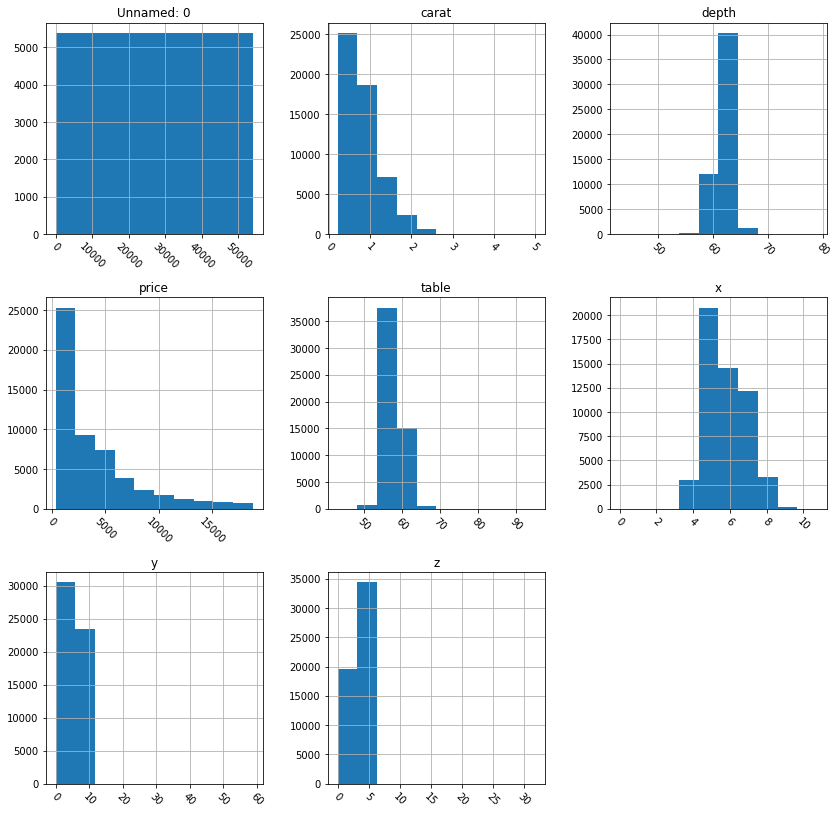

In [7]:
# Plot histogram grid
df.hist(figsize = (14,14), xrot = -45)
plt.show()

* Are any of the **count** values less than the total number of observations? No
* Do the **min** values for each column make sense? No, there are dimension equal to zero for x, y and z
* Do the **max** values for each column make sense? Yes

In [8]:
# Summary statistics for numerical features
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<span style="font-size:18px">**3. Distributions of categorical features**</span>

* How many **unique** classes does it have? For cut, color and clarity, 5, 7 and 8, respectively
* What is the most frequent class? Ideal, G and SI1
* How many observations belong to the most frequent class? 21551, 11292, 13065
* Does it have any missing values? No

In [9]:
# Summarize categorical features
df.describe(include = 'object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


* Are there any classes that might be **sparse**?
* Are there any classes that shouldn't be in the dataset based on ou **project scope**?
* Are there any **mislabeled classes**?
* Do the distributions seem intuitive?

Sparse classes are classes in categorical features that have a very small number of observations.

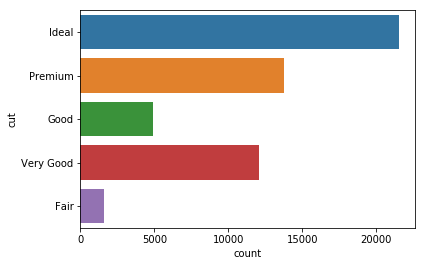

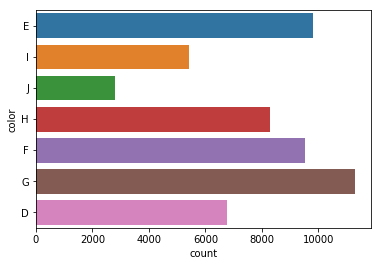

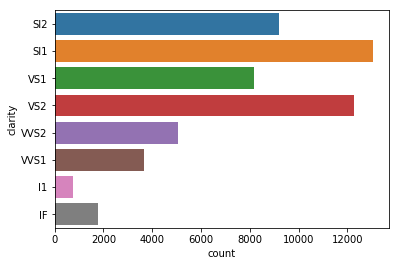

In [10]:
# Plot bar plot for each categorical feature
for name in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y = name, data = df)
    plt.show()

<span style="font-size:18px">**4. Segmentations**</span><br>
<br>
Segmentation is powerful to observe the relationship between **categorical features** and **numeric features**

* Which type of **categorical feature** is larger, on average?
* Which type of **categorical feature** sees greater variance in sizes?
* Does the difference in distributions between classes make intuitive sense?

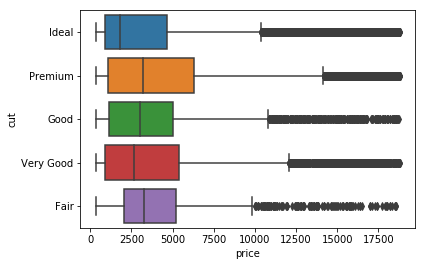

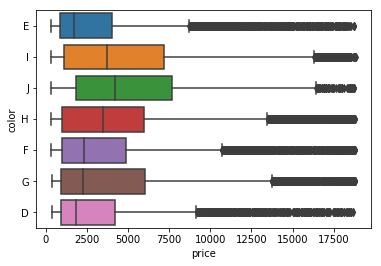

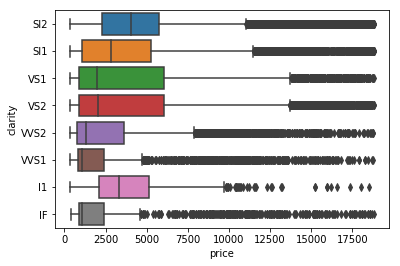

In [11]:
# Segment 'numeric feature' by 'categorical feature' and plot distributions
for name in df.dtypes[df.dtypes == 'object'].index:
    sns.boxplot(x = 'price', y = name, data = df)
    plt.show()

In [12]:
# Segment by categorical_feature and display the means within each class
df.groupby('cut').agg([np.mean,np.std])

Unnamed: 0                   carat                depth  \
                   mean           std      mean       std       mean   
cut                                                                    
Fair       24147.357764  18021.165757  1.046137  0.516404  64.041677   
Good       24774.931309  16572.828068  0.849185  0.454054  62.365879   
Ideal      29047.630736  15044.527014  0.702837  0.432876  61.709401   
Premium    25600.209049  14917.011708  0.891955  0.515262  61.264673   
Very Good  26097.313193  16013.360517  0.806381  0.459435  61.818275   

                         table                  price                      x  \
                std       mean       std         mean          std      mean   
cut                                                                            
Fair       3.643428  59.053789  3.946261  4358.757764  3560.386612  6.246894   
Good       2.169374  58.694639  2.851300  3928.864452  3681.589584  5.838785   
Ideal      0.718539  55.951668  1.246423  3457.541970  3808.401172  5.507451   
Premium    1.158815  58.746095  1.478573  4584.257704  4349.204961  5.973887   
Very Good  1.378631  57.956150  2.121448  3981.759891  3935.862161  5.740696   

                            y                   z            
                std      mean       std      mean       std  
cut                                                          
Fair       0.964317  6.182652  0.956380  3.982770  0.651638  
Good       1.057301  5.850744  1.051535  3.639507  0.654893  
Ideal      1.064210  5.520080  1.074495  3.401448  0.657648  
Premium    1.188252  5.944879  1.259751  3.647124  0.731161  
Very Good  1.100839  5.770026  1.102924  3.559801  0.730228

<span style="font-size:18px">**5. Advanced segmentations**</span><br>
<br>
When the target variable is categorical, it can often be helpful to expand the segmentation analysis. <br>
It is recommended to segment key numeric features by the target variable. <br>
The bivariate segmentation is a quick way to see if there are potential **interactions** between different features.

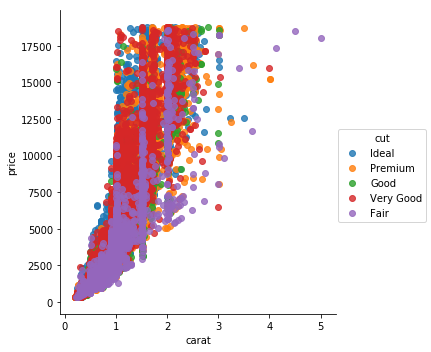

In [13]:
# Scatterplot of two numeric features, where the color of each point is 
# based on its 'categorical feature'
sns.lmplot(x = 'carat', 
           y = 'price',
          data = df,
          hue = 'cut',
          fit_reg = False)
plt.show()

<span style="font-size:18px">**6. Correlations**</span><br>
<br>
Relationships between **numeric features**
* near -1/+1 indicate a **strong relationship**
* near 0 indicate a **weak relationship**
* 0 indicate **no relationship**

In [14]:
# Calculate correlations between numeric features
correlations = df.corr()

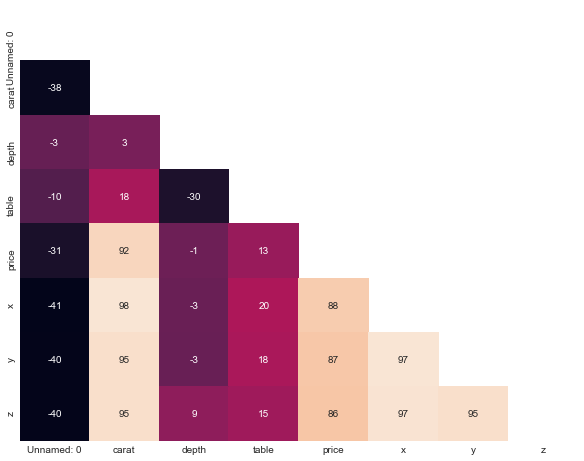

In [15]:
# Change color scheme
sns.set_style(style = "white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Make the figsize 10 x 8
plt.figure(figsize = (10,8))

# Plot heatmap of annotated correlations
sns.heatmap(correlations*100, 
            annot = True, 
            fmt = '.0f', 
            mask = mask,
            cbar = False)
plt.show()